In [213]:
import pandas as pd
from kneed import KneeLocator
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from transformers import pipeline

In [204]:
df = pd.read_csv("/Users/leo/M2TALS1/project/movies_metadata.csv")
df.shape

/var/folders/qw/ppnlkp3d64s3j26nm8dvxq800000gn/T/ipykernel_39526/138597897.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/leo/M2TALS1/project/movies_metadata.csv")


(45466, 24)

In [223]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [222]:
df["overview"][0]

"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences."

In [205]:
df["genres"] = df["genres"].apply(ast.literal_eval)
exploded = df.explode("genres")
romance_df = exploded.loc[exploded["genres"].apply(lambda x: isinstance(x, dict) and x["name"] == "Romance")]
romance_df.shape

(6735, 24)

In [206]:
romance_df["overview"].replace("", np.nan)
romance_df = romance_df[~romance_df["overview"].isna()]
romance_df.shape

(6673, 24)

In [207]:
romance_df["vote_count"] = romance_df["vote_count"].fillna(0)
print(romance_df.sort_values("vote_count").iloc[-1]["vote_count"])


8147.0


In [208]:
counts = romance_df["vote_count"].value_counts()
n_of_votes = counts.index
count_of_n = counts.values

Text(0, 0.5, 'count of number of votes')

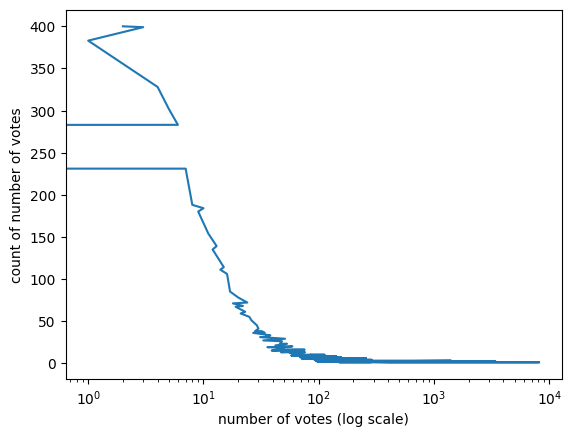

In [209]:
plt.plot(n_of_votes, count_of_n)
plt.xscale('log')
plt.xlabel('number of votes (log scale)')
plt.ylabel('count of number of votes')

In [210]:
# find the knee of the curve
kneedle = KneeLocator(n_of_votes, count_of_n, curve="convex", direction="decreasing")
cutoff = kneedle.knee
print(cutoff)

28.0


In [224]:
romance_df = romance_df[romance_df["vote_count"] <= 28.0]
romance_df.shape

(4623, 24)

First step on having a workable dataset ! 
Let's try some sentiment analysis to see how much it would further reduce the dataset.

In [219]:
romance_df.to_csv("./romance_dataset.csv")